# Stock Price Prediction
Stock market is interesting place to learn about forecasting time series. I wanted here to show one way predicting the stock prices.

Use Case: Yahoo Finance - Stock Prices Analyse and Predict

In [17]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [36]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out)
    #creating new column called label with the last 5 rows are nan
    
    X = np.array(df[[forecast_col]])
    #creating the feature array
    
    X = preprocessing.scale(X)
    #processing the feature array
    
    X_lately = X[-forecast_out:]
    #creating the column i want to use later in the predicting method
    
    X = X[:-forecast_out]
    # X that will contain the training and testing
    
    label.dropna(inplace=True)
    #dropping na values
    
    y = np.array(label)
    # assigning Y
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    
    return response

In [19]:
#!pip install yfinance
import yfinance as yf

Yahoo finance

In [20]:
#!pip install pandas_datareader
from pandas_datareader import data as wb

[*********************100%***********************]  1 of 1 completed


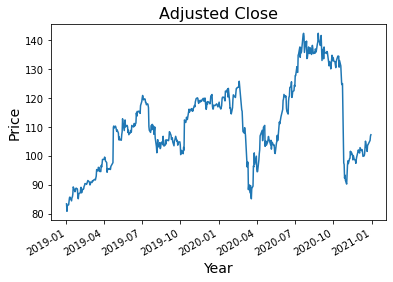

In [35]:
# Get the data of the stock SAP Germany
sap = yf.download('SAP.DE','2019-01-01','2020-12-31')

# Plot the close price of the SAP Germany
sap['Adj Close'].plot()

plt.title("Adjusted Close", fontsize=16)
# Define the labels for x-axis and y-axis

plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

In [22]:
sap.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,87.000000,87.400002,85.690002,87.010002,83.371490,2177418
2019-01-03,85.500000,85.760002,83.949997,84.309998,80.784401,3051656
2019-01-04,84.750000,86.779999,84.040001,86.440002,82.825333,3606453
2019-01-07,87.199997,87.199997,86.040001,86.620003,82.997803,2200325
2019-01-08,86.750000,88.809998,86.660004,87.970001,84.291351,2672217


In [23]:
sap.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,113.179006,114.343181,111.958449,113.203797,110.773961,2.839237e+06
std,13.825077,13.780123,13.711377,13.720281,14.453236,2.083629e+06
min,84.750000,85.760002,82.129997,84.309998,80.784401,6.767630e+05
25%,102.119999,103.160000,100.639999,102.080002,100.680672,1.783905e+06
50%,112.239998,113.839996,111.040001,112.500000,109.207413,2.226387e+06
75%,122.540001,123.730003,121.599998,122.680000,119.733894,3.018592e+06
max,142.800003,143.320007,141.080002,142.259995,142.259995,2.220034e+07


In [24]:
sap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2019-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       503 non-null    float64
 1   High       503 non-null    float64
 2   Low        503 non-null    float64
 3   Close      503 non-null    float64
 4   Adj Close  503 non-null    float64
 5   Volume     503 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


In [38]:
stock_sap_df = pd.DataFrame(sap)
# Fetch the data

stock_sap_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,87.000000,87.400002,85.690002,87.010002,83.371490,2177418
2019-01-03,85.500000,85.760002,83.949997,84.309998,80.784401,3051656
2019-01-04,84.750000,86.779999,84.040001,86.440002,82.825333,3606453
2019-01-07,87.199997,87.199997,86.040001,86.620003,82.997803,2200325
2019-01-08,86.750000,88.809998,86.660004,87.970001,84.291351,2672217
...,...,...,...,...,...,...
2020-12-22,102.099998,103.959999,101.900002,103.620003,103.620003,2628214
2020-12-23,104.080002,104.199997,103.220001,103.760002,103.760002,1628435
2020-12-28,105.099998,106.120003,104.660004,105.260002,105.260002,2057725


In [33]:
forecast_col = 'Close'
forecast_out = 5
test_size = 0.2

X_train, X_test, Y_train, Y_test , X_lately = prepare_data(stock_sap_df,
                                                           forecast_col,
                                                           forecast_out,
                                                           test_size); 
#calling the method were the cross validation and data preperation is in

learner = LinearRegression()
#initializing linear regression model

learner.fit(X_train,Y_train)
#training the linear regression model

LinearRegression()

In [31]:
score=learner.score(X_test,Y_test)
#testing the linear regression model

forecast= learner.predict(X_lately)
#set that will contain the forecasted data

response={}
#creting json object

response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.870681426804965, 'forecast_set': array([104.72467068, 104.85015333, 106.19461617, 107.57493218,
       107.95138014])}
